<center><img src="img/EdTech_logo.png" style="width: 500px;"/></center>

Notre start-up de la EdTech, nommée **academy**, propose des contenus de formation en ligne pour un public de niveau lycée et université. Dans le cadre de notre projet d’expansion à l’international de l’entreprise, nous avons réalisé une analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer sur ce projet.  

**Les objectifs sont :**
- Déterminer les pays avec un fort potentiel de clients pour nos services.
- Évaluer l’évolution de ce potentiel de clients.
- Les pays dans lesquels l'entreprise doit opérer en priorité.


**Les données :**

Les données que nous utiliserons proviennent de la Banque mondiale **The World Bank** “EdStats All Indicator Query” disponible à l'adresse suivante :  https://datacatalog.worldbank.org/dataset/education-statistics . Elle répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation..

Nous disposons de 5 fichiers :

<center><img src="img/Vue_ens_fichiers.png" style="width: 1000px;"/></center>

**Les indicateurs :**

Pour répondre à nos objectifs, nous allons choisir des indicateurs qui pourront apporter une aide dans la segmentation des populations. Nous choisissons 3 axes :
- Population étudiante
- PIB moyen (financement des études)
- Connectivité à internet
!!! A Développer

Nous allons donc :  
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

---

# Importation des librairies

In [1]:
#!pip freeze > requirements.txt

In [2]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format


# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

In [3]:
# Versions 
print('Version des librairies utilisées :')
print('Python   : ' + sys.version)
print('NumPy    : ' + np.version.full_version)
print('Pandas   : ' + pd.__version__)
print('Seaborn  : ' + sns.__version__)

Version des librairies utilisées :
Python   : 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
NumPy    : 1.20.3
Pandas   : 1.4.1
Seaborn  : 0.11.2


In [4]:
%%html
<style>
    table {float:left}
</style>

Instalation des librairies :

In [5]:
#!pip install -r requirements.txt

---

# Importation des données

## Données EdStatsData

EdStatsData contient des valeurs par indicateurs, par an et par pays.

In [6]:
df_stats = pd.read_csv('data/EdStatsData.csv')
df_stats.sample(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
686363,Samoa,WSM,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Spanish. 4th Grade,LO.EGRA.CWPM.ZERO.SPN.4GRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818750,Turkey,TUR,LLECE: Female 3rd grade students by mathematics proficiency level (%). Level 4,LO.LLECE.MAT3.4.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
!head -1 data/EdStatsData.csv

﻿"Country Name","Country Code","Indicator Name","Indicator Code","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2020","2025","2030","2035","2040","2045","2050","2055","2060","2065","2070","2075","2080","2085","2090","2095","2100",


> La colonne "Unnamed: 69" s'explique par la présence d'un séparateur à la fin de chaque ligne. Il s'agit d'un soucis de formatage du fichier csv.

In [8]:
df_stats = df_stats.drop(columns='Unnamed: 69')

### Description des données

| Variables | Définition |
| --- | --- |
| Country Name | Nom du pays (ou de la région) |
| Country Code | Code du pays |
| Indicator Name | Nom de l'indicateur |
| Indicator Code | Code de l'indicateur |
| 1970-2100 | Valeurs par années |

In [9]:
print("")
print("EdStatsData")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats.shape[0],df_stats.shape[1]))

duplicates = df_stats.duplicated(subset=["Country Code","Indicator Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_stats['Country Code'].unique())))
print("{} indicateurs uniques.".format(len(df_stats['Indicator Code'].unique())))
print("")


EdStatsData
----------------------------------
886930 entrées et 69 variables.
Absence de données dupliquées.
242 Country Code référencés.
3665 indicateurs uniques.



### Données manquantes

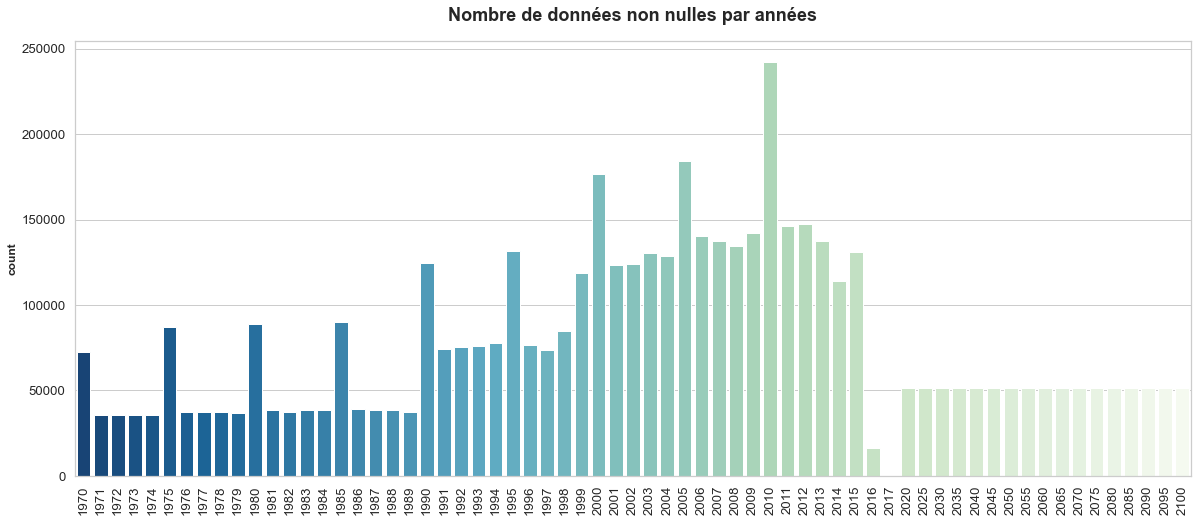

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df_stats, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Les années 2016 et 2017 ne présente pas un nombre de données suffisantes. Les années de 2020 à 2100 semblent être des données prédictives.
> Nous allons garder comme plage d'année **2000 à 2015** au vu du nombre de leurs valeurs nulles.  

## Données EdStatsSeries

EdStatsSeries contient des informations sur les indicateurs. Nous allons voir quelles informations peuvent être retenus pour nous aider dans le traitement de nos indicateurs.

In [11]:
df_stats_series = pd.read_csv('data/EdStatsSeries.csv')
df_stats_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
!head -1 data/EdStatsSeries.csv

﻿"Series Code","Topic","Indicator Name","Short definition","Long definition","Unit of measure","Periodicity","Base Period","Other notes","Aggregation method","Limitations and exceptions","Notes from original source","General comments","Source","Statistical concept and methodology","Development relevance","Related source links","Other web links","Related indicators","License Type",


In [13]:
df_stats_series = df_stats_series.drop(columns='Unnamed: 20')

### Description des données

In [14]:
print(df_stats_series.info())

print("")
print("EdStatsSeries")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_stats_series.shape[0],df_stats_series.shape[1]))

duplicates = df_stats_series.duplicated(subset=["Series Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("Nombre de Topic : {}".format(len(df_stats_series['Topic'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### Données manquantes

Nous gardons les colonnes qui contiennet suffisament de données.

In [15]:
df_stats_series_selected = df_stats_series.drop(columns = df_stats_series.loc[:,'Unit of measure':'General comments'])
df_stats_series_selected = df_stats_series_selected.drop(columns=df_stats_series_selected.loc[:,'Statistical concept and methodology':'License Type'])

In [16]:
df_stats_series_selected.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/


## Données EdStatsCountry

In [17]:
df_country = pd.read_csv('data/EdStatsCountry.csv')
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.00,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.00,2000,NaN


In [18]:
!head -1 data/EdStatsCountry.csv

﻿"Country Code","Short Name","Table Name","Long Name","2-alpha code","Currency Unit","Special Notes","Region","Income Group","WB-2 code","National accounts base year","National accounts reference year","SNA price valuation","Lending category","Other groups","System of National Accounts","Alternative conversion factor","PPP survey year","Balance of Payments Manual in use","External debt Reporting status","System of trade","Government Accounting concept","IMF data dissemination standard","Latest population census","Latest household survey","Source of most recent Income and expenditure data","Vital registration complete","Latest agricultural census","Latest industrial data","Latest trade data","Latest water withdrawal data",


In [19]:
df_country = df_country.drop(columns='Unnamed: 31')

### Description des données

In [20]:
print(df_country.info())

print("")
print("EdStatsCountry")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country.shape[0],df_country.shape[1]))

duplicates = df_country.duplicated(subset=["Country Code"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country['Country Code'].unique())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### Données manquantes

In [21]:
df_country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

> Nous observons qu'il y a 27 valeurs manquantes pour la variable "Region". Le nombre d'entrées est de 241, hors selon l'ONU, il y a 197 Etats dans le monde. La liste des "Country" sans nom de région, semblerai donc indiquer qu'il s'agit de régions.

**Données de régions :**

In [22]:
list_region_income_group = df_country[df_country['Region'].isnull()]['Short Name'].unique()

list_income_groups = [x for x in list_region_income_group if x.endswith('income')]
list_regions = [x for x in list_region_income_group if not x.endswith('income')]

print("")
print("Il y a {} 'Country Code' référencés.".format(len(df_country['Country Code'].unique())))
print("Nombre d'entreés ne possédant pas de région : {}".format(len(list_region_income_group)))

print("")
print("Liste des income levels :")
print("----------------------------------")
print(*list_income_groups, sep = "\n")

print("")
print("Liste des régions :")
print("----------------------------------")
print(*list_regions, sep = "\n")


Il y a 241 'Country Code' référencés.
Nombre d'entreés ne possédant pas de région : 27

Liste des income levels :
----------------------------------
High income
Low income
Lower middle income
Low & middle income
Middle income
Upper middle income

Liste des régions :
----------------------------------
Arab World
East Asia & Pacific (developing only)
East Asia & Pacific (all income levels)
Europe & Central Asia (developing only)
Europe & Central Asia (all income levels)
Euro area
European Union
Gibraltar
Heavily indebted poor countries (HIPC)
Latin America & Caribbean (developing only)
Latin America & Caribbean (all income levels)
Least developed countries: UN classification
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
North America
Nauru
OECD members
South Asia
Sub-Saharan Africa (developing only)
Sub-Saharan Africa (all income levels)
World


In [23]:
country_by_income_grp = df_country.groupby('Income Group')[['Short Name']].count().reset_index()
country_by_income_grp = country_by_income_grp.sort_values(by='Short Name', ascending=False)

country_by_region = df_country.groupby('Region')[['Short Name']].count().reset_index()
country_by_region = country_by_region.sort_values(by='Short Name', ascending=False)
print(country_by_region.head(5))

                       Region  Short Name
1       Europe & Central Asia          57
6          Sub-Saharan Africa          48
2   Latin America & Caribbean          41
0         East Asia & Pacific          36
3  Middle East & North Africa          21


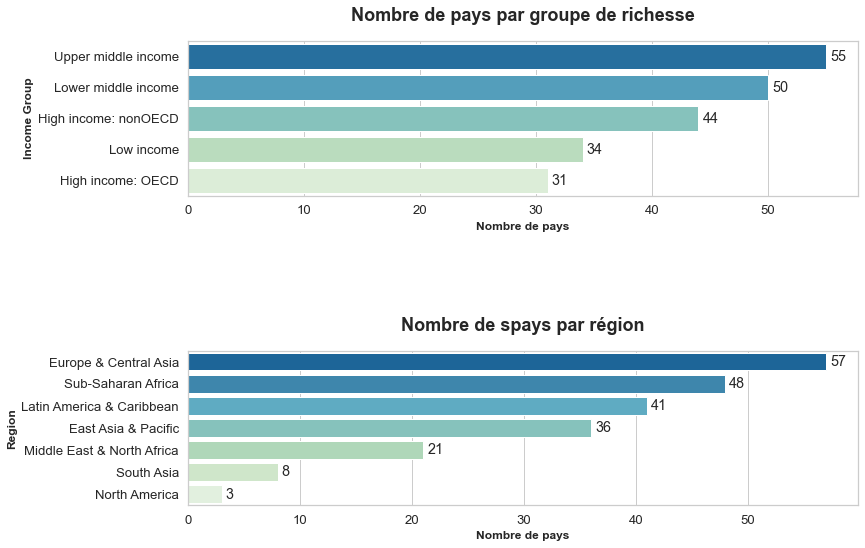

In [24]:
plt.subplot(2,1,1)
ax = sns.barplot(data=country_by_income_grp, x="Short Name", y="Income Group", palette="GnBu_r")
ax.set_title('Nombre de pays par groupe de richesse')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplot(2,1,2)
ax = sns.barplot(data=country_by_region, x="Short Name", y="Region", palette="GnBu_r")
ax.set_title('Nombre de spays par région')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplots_adjust(top=1.2, hspace = 1, wspace = 1)
plt.show()

> Nous pouvons utiliser les données **EdStatsCountry** pour segementer nos données **EdStatsData** par pays et par régions.

## Données EdStatsCountrySeries

In [25]:
df_country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
df_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [26]:
!head -1 data/EdStatsCountry-Series.csv

﻿"CountryCode","SeriesCode","DESCRIPTION",


In [27]:
df_country_series = df_country_series.drop(columns='Unnamed: 3')

### Description des données

In [28]:
df_country_series.info()

print("")
print("EdStatsCountry-Series")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_country_series.shape[0],df_country_series.shape[1]))

duplicates = df_country_series.duplicated(subset=["CountryCode"], keep='first')
if duplicates.any():
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_country_series['CountryCode'].unique())))

list_country_series_code = list(df_country_series['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_country_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB

EdStatsCountry-Series
----------------------------------
613 entrées et 3 variables.
Présence de données dupliquées.
211 Country Code référencés.
21 indicateurs uniques.


### Données manquantes

In [29]:
# List of indicators
print(list_country_series_code)

['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS', 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS', 'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO', 'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN']


In [30]:
countries_by_indicator = df_country_series.groupby('SeriesCode').count().reset_index()
countries_by_indicator = countries_by_indicator.sort_values(by='CountryCode', ascending=False)

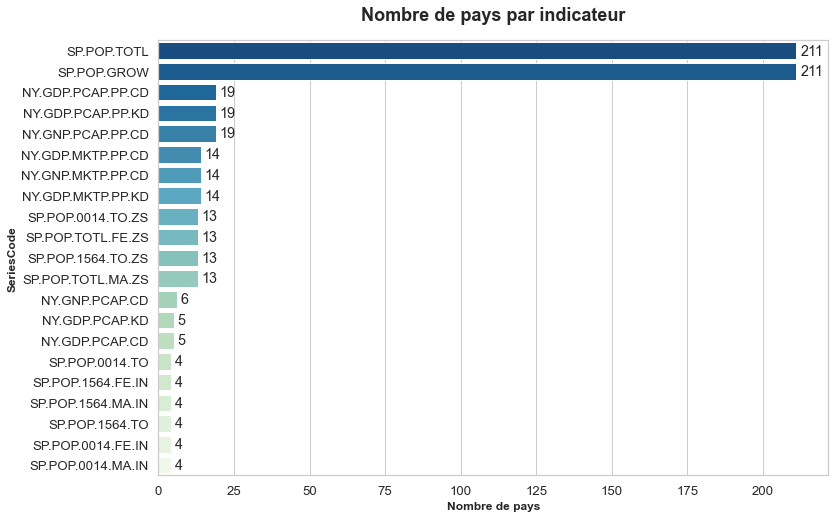

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title('Nombre de pays par indicateur')
ax.set(xlabel='Nombre de pays')

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> Nous garderons pour notre analyse les indicateurs **SP.POP.TOTL** et **SP.POP.GROW**.

In [32]:
list_country_series_code.remove('SP.POP.TOTL')
list_country_series_code.remove('SP.POP.GROW')

df_stats_selected = df_stats[~df_stats['Indicator Code'].isin(list_country_series_code)]

## Données EdStatsFootNote

In [33]:
df_foot_note = pd.read_csv('data/EdStatsFootNote.csv')
df_foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [34]:
!head -1 data/EdStatsFootNote.csv

﻿"CountryCode","SeriesCode","Year","DESCRIPTION",


In [35]:
df_foot_note = df_foot_note.drop(columns='Unnamed: 4')

### Description des données

In [36]:
print(df_foot_note.info())

print("")
print("EdStatsFootNote")
print("----------------------------------")
print("{} entrées et {} variables.".format(df_foot_note.shape[0],df_foot_note.shape[1]))

duplicates = df_foot_note.duplicated(subset=["CountryCode"], keep='first')
if True in list(duplicates.unique()):
    print("Présence de données dupliquées.")
else:
    print("Absence de données dupliquées.")

print("{} Country Code référencés.".format(len(df_foot_note['CountryCode'].unique())))

list_foot_note_series_code = list(df_foot_note['SeriesCode'].unique())
print("{} indicateurs uniques.".format(len(list_foot_note_series_code)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB
None

EdStatsFootNote
----------------------------------
643638 entrées et 4 variables.
Présence de données dupliquées.
239 Country Code référencés.
1558 indicateurs uniques.


### Répartition des données

In [37]:
df_foot_note_by_year = df_foot_note
df_foot_note_by_year['year_formated'] = df_foot_note_by_year['Year'].apply(lambda x : x[-4:]).astype('int')
df_foot_note_by_year = df_foot_note_by_year.groupby('year_formated').count().reset_index()

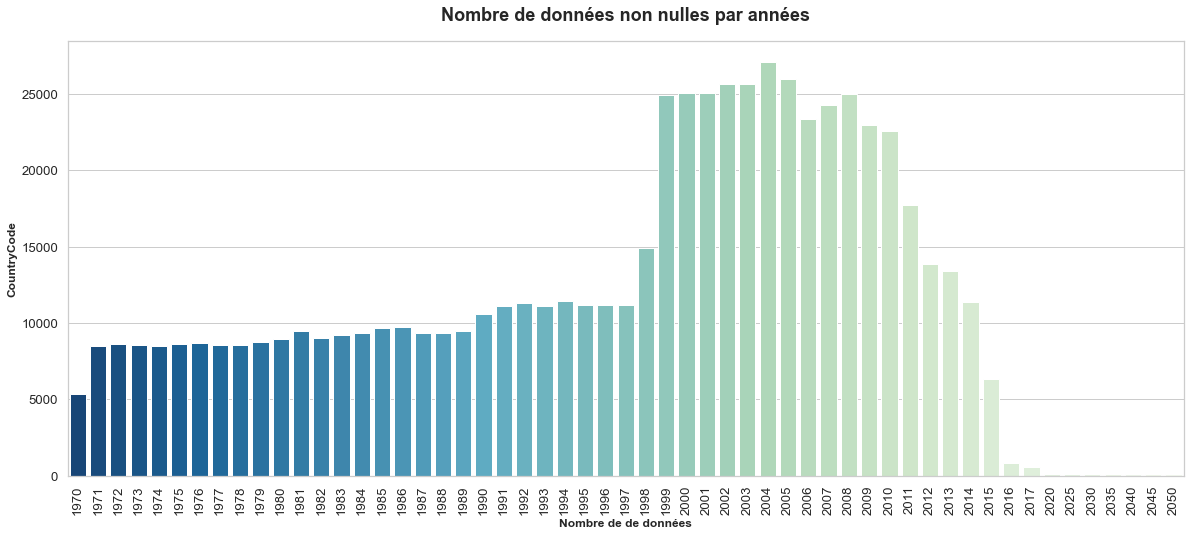

In [38]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x="year_formated", y="CountryCode", data=df_foot_note_by_year, palette="GnBu_r")
ax.set_title('Nombre de données non nulles par années')
ax.set(xlabel='Years')
ax.set(xlabel='Nombre de de données')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [39]:
foot_note_countries_by_indicator = df_foot_note.groupby('SeriesCode')[['CountryCode']].count().reset_index()
foot_note_countries_by_indicator = foot_note_countries_by_indicator.sort_values(by='CountryCode', ascending=False)
foot_note_countries_by_indicator = foot_note_countries_by_indicator.head(15)

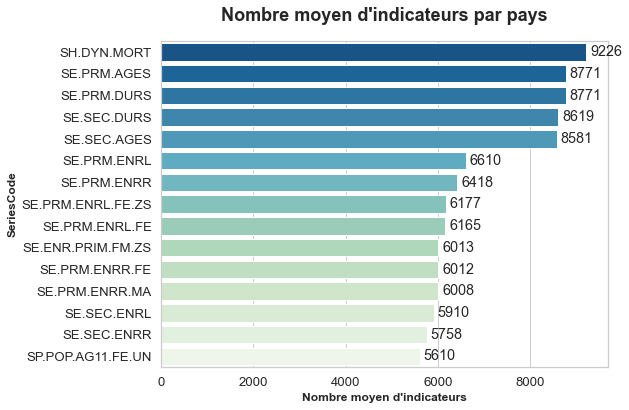

In [40]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=foot_note_countries_by_indicator, x="CountryCode", y="SeriesCode", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

> ?????

# Nettoyage des données et sélection des indicateurs

## Initialisation et données de travail

### Sélection des années

Nous avons sélectionné les années de 2000 à 2015 pour les données EdStatsData :

In [41]:
df_stats_selected = df_stats_selected.drop(columns = df_stats_selected.loc[:,'1970':'1999'])
df_stats_selected = df_stats_selected.drop(columns=df_stats_selected.loc[:,'2016':'2100'])

> Nous avons maintenant des données sur une période ciblée. Il y a cependant un grand nombre d'incateurs par Country Code et de valeurs manquantes. Nous devons sélectionner les indicateurs les plus pertinents qui participerons à répondre à nos problématiques.

### Merge EdStatsData,EdStatsCountry et EdStatsSeries

**- Merge EdStatsCountry:**

On récupére ici les régions des pays et leurs group de 'income'.

In [42]:
df_country_clean = df_country[['Country Code', 'Region', 'Income Group']]
df_country_clean.head()

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD


In [43]:
df_stats_s_all = df_country_clean.merge(df_stats_selected, how='left', on='Country Code')

**- Merge EdStatsSeries:**

On récupére ici les informations sur les différents indicateurs.

In [44]:
df_stats_series_selected.rename(columns = {'Series Code' : 'Indicator Code'}, inplace=True)
df_stats_s_all = df_stats_s_all.merge(
    df_stats_series_selected, how='inner', on='Indicator Code')

df_stats_s_all = df_stats_s_all.drop(columns=['Indicator Name_y'])
df_stats_s_all.rename(columns = {'Indicator Name_x' : 'Indicator Name'}, inplace=True)

In [45]:
df_stats_s_all.head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source
0,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,56.16,45.72,53.00,49.97,53.10,59.06,NaN,60.72,60.64,62.81,NaN,78.05,NaN,NaN,NaN,NaN,Secondary,NaN,"Total number of students of the official lower secondary school age group who are enrolled in lower secondary education or higher, expressed as a percentage of the corresponding population. Divide the total number of students in the official lower secondary school age range who are enrolled in lower secondary education or higher by the population of the same age group and multiply the result by 100. NERA should be based on total enrolment of the official school participation age group for all types of schools and education institutions, including public, private and all other institutions that provide organized educational programmes.",UNESCO Institute for Statistics


### Suppression des lignes vide

Afin de limiter le nombre total d'indicateurs à analyser, on commence par supprimer les indicateurs n'ayant pas de valeurs sur nos années sélectionnées.

In [46]:
list_columns = list(df_stats_s_all.loc[:,"2000":"2015"])
df_stats_s_all = df_stats_s_all.dropna(how="all", subset=list_columns)

### Données de travail

**- Données par pays :**

In [47]:
df_stats_p = df_stats_s_all[df_stats_s_all['Region'].notnull()]

print("Nombre de Pays : {}".format(len(df_stats_p['Country Code'].unique())))

Nombre de Pays : 214


**- Données par région :**

In [48]:
df_stats_r = df_stats_s_all[df_stats_s_all['Region'].isnull()]   

print("Nombre de Régions : {}".format(len(df_stats_r['Country Code'].unique())))

Nombre de Régions : 27


On fusionne les données de EdStatsData avec EdStatsSeries. Cela permets d'inclure les définitions des indicateurs dans notre datafarme de travail.

### Fonction de calcul de taux d'indicateurs

**- Nombre de valeurs par pays :**

In [49]:
df_stats_p_values = df_stats_p.loc[:,'2000':'2015']
df_stats_p['not_null_values'] = df_stats_p_values.count(axis=1)
df_stats_p.sample(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values
830326,GNB,Sub-Saharan Africa,Low income,Guinea-Bissau,Wittgenstein Projection: Percentage of the population age 40-64 by highest level of educational attainment. Incomplete Primary. Male,PRJ.ATT.4064.S1.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,0.12,Attainment,NaN,"Share of the population of the stated age group that has pre-primary education or incomplete primary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",Wittgenstein Centre for Demography and Global Human Capital: http://www.oeaw.ac.at/vid/dataexplorer/,2


**- Fonction de calcul du taux de valeurs non nulles par indicateurs :**

In [50]:
size_years = len(df_stats_p.loc[:,'2000':'2015'].columns.values.tolist())
total_nb_countries = len(df_stats_p['Country Code'].unique())
df_stats_shot = df_stats_series_selected[['Indicator Code', 'Indicator Name', 'Long definition']]

def values_rate(dataframe):
    
    if not dataframe.empty:
        
        # pivot table by indicators
        df_pivot = pd.pivot_table(
            dataframe,
            index=['Indicator Code'],
            aggfunc={'Country Code': len, 'not_null_values': np.sum}
            ).rename(columns={'Country Code': 'Nb de pays', 'not_null_values': 'Nb Valeurs'})
        
        # get number of columns not null
        df_grp = dataframe.groupby('Indicator Code').count().reset_index()
        df_grp_years = df_grp.loc[:,'2000':'2015']
        df_grp_years.replace(0, np.nan, inplace=True)
        df_pivot['nb_years'] = df_grp_years.count(axis=1).values
        
        # ratio of countries to total
        df_pivot['Ratio country'] = df_pivot['Nb de pays'] / total_nb_countries
        
        # ratio not null value 
        df_pivot['Values ratio by country'] = df_pivot['Nb Valeurs'] / (df_pivot['Nb de pays'] * df_pivot['nb_years'])
        
        # rearrange dataframe
        df_pivot = df_pivot.sort_values(by='Ratio country', ascending=False)
        df_pivot = df_pivot.merge(df_stats_shot, how='left', on='Indicator Code')
        
        df_pivot = df_pivot[[
            'Indicator Code',
            'Indicator Name',
            'Long definition',
            'Nb de pays',
            'Ratio country', 
            'Nb Valeurs',
            'nb_years',
            'Values ratio by country'
        ]]

        return df_pivot
    
    else:
        print("No data")

### Fonction de discréditation des genres

En faisant une recherche sur les indicateurs, on remarque que ces derniers sont déclinés en sous-indicateurs par genre. Ceux-ci :
- contiennent : "F", "M", "FE", MA"
- se terminent par : "F", "M", "FE", "GPI", "MA", "FE.ZS", "MA.ZS"  

On crée une fonction qui servira à discréditer les genres sur les inficateurs étudiés :

In [51]:
def drop_gender(dataframe):
    result = dataframe[~dataframe['Indicator Code'].str.endswith((
        '.F','.M','.GPI','FE','MA','FE.ZS','MA.ZS'))]

    result = result[~result['Indicator Code'].str.contains(
        ".F.|.M.|.FE.|.MA.|.AG", regex=True)]
    
    return result

### Préselection par taux de remplissage

In [52]:
limit_ratio = 0.6

In [53]:
df_stats_p_rate = values_rate(df_stats_p)
df_stats_p_rate_select = df_stats_p_rate[df_stats_p_rate['Values ratio by country'] > limit_ratio]
df_stats_p_rate_select = df_stats_p_rate[df_stats_p_rate['Ratio country'] > limit_ratio]

pre_selested_indicators = df_stats_p_rate_select['Indicator Code'].unique().tolist()

df_stats_p = df_stats_p[df_stats_p['Indicator Code'].isin(pre_selested_indicators)]
df_te = values_rate(df_stats_p)
df_te.sort_values(by='Values ratio by country', ascending=False).head(5)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
770,PRJ.POP.1519.2.FE,Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Female,"Total population in thousands in the specified age group that has completed lower secondary or incomplete upper secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",166,0.78,332,2,1.00
771,PRJ.POP.1519.1.MF,Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Total,"Total population in thousands in the specified age group that has completed primary education or incomplete lower secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",166,0.78,332,2,1.00
779,PRJ.MYS.65UP.FE,Projection: Mean years of schooling. Age 65+. Female,"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",166,0.78,332,2,1.00
778,PRJ.MYS.65UP.MA,Projection: Mean years of schooling. Age 65+. Male,"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",166,0.78,332,2,1.00
777,PRJ.MYS.65UP.MF,Projection: Mean years of schooling. Age 65+. Total,"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/",166,0.78,332,2,1.00


In [54]:
#values_rate(df_stats_p)
df_stats_p[df_stats_p['Indicator Code']=='NY.GDP.PCAP.CD']
df_stats_p[df_stats_p['Indicator Code']=='NY.GDP.PCAP.PP.CD']
#df_stats_p[df_stats_p['Indicator Code']=='OECD.TSAL.3.E15'].head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values


In [55]:
df_stats_p[df_stats_p['Indicator Code']=='NY.GDP.PCAP.PP.CD']

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Short definition,Long definition,Source,not_null_values


## Analyses des indicateurs par catégories

### Liste des catégories (Topic)

In [56]:
list_topics = df_stats_p['Topic'].unique()
print(*list_topics, sep = "\n")

Secondary
Primary
Literacy
Expenditures
Attainment
Background
Early Childhood Education
Tertiary
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators
Post-Secondary/Non-Tertiary
Pre-Primary
Infrastructure: Communications
Social Protection & Labor: Labor force structure
Health: Mortality
Teachers
Health: Population: Dynamics
Population
Health: Population: Structure
Health: Risk factors
Social Protection & Labor: Unemployment


### Catégories non retenues

Par rapport à notre contexte, certains Topic ne vont pas nous apporter d'informations. On retrouve des catégories concernant la santé, l'égalité ou les protections sociales :

| Catégorie | Définition | 
| --- | --- |
| Primary | L'éducation du niveau primaire |
| Literacy | Informations sur l'alphabétisation |
| Expenditures | Dépenses des pays en matière d'éducation à partir des données administratives communiquées par les pays à l'Institut de statistique de l'UNESCO et sur la base de données des dépenses publiques d'éducation de la Banque mondiale.  |
| Education Equality | Egalité en éducation. |
| Background | ??? |
| Early Childhood Education | L'éducation de la petite enfance |
| Pre-Primary | ??? |
| Health: Risk factors | ??? |
| Health: Mortality | ??? |
| Social Protection & Labor: Labor force structure | ??? |
| Social Protection & Labor: Unemployment | ??? |
| Health: Population: Structure | ??? |
| Health: Population: Dynamics | ??? |

**Liste des catégories non retenues :**

In [57]:
list_topic_to_remove = [
    'Primary',
    'Literacy',
    'Teachers',
    'Expenditures',
    'Education Equality',
    'Background',
    'Early Childhood Education',
    'Post-Secondary/Non-Tertiary',
    'Pre-Primary',
    'Health: Risk factors',
    'Health: Mortality',
    'Social Protection & Labor: Labor force structure',
    'Social Protection & Labor: Unemployment',
    'Laber'
]

df_stats_p = df_stats_p[~df_stats_p['Topic'].isin(list_topic_to_remove)]

### Catégories les plus représentées

In [58]:
data_by_topic = df_stats_p.groupby('Topic')[['Country Code']].count().reset_index()
data_by_topic = data_by_topic.sort_values(by='Country Code', ascending=False)
print(data_by_topic.head())

                           Topic  Country Code
0                     Attainment        107735
6                     Population         40822
7                      Secondary         33830
8                       Tertiary         16568
4  Health: Population: Structure           602


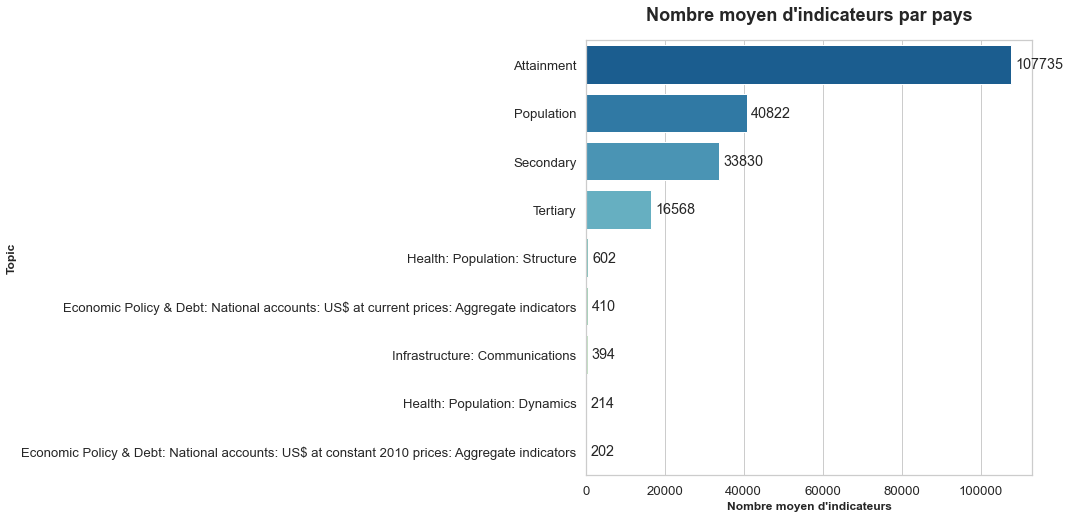

In [59]:
plt.figure(figsize=(8,8))
ax = sns.barplot(data=data_by_topic, x="Country Code", y="Topic", palette="GnBu_r")
ax.set_title("Nombre moyen d'indicateurs par pays")
ax.set(xlabel="Nombre moyen d'indicateurs")

for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.show()

### Population

In [60]:
df_pop_g = df_stats_p[df_stats_p['Topic']=='Population']
df_pop = drop_gender(df_pop_g)
df_pop['Indicator Code'].unique()

array(['UIS.SAP.CE', 'SP.SEC.LTOT.IN', 'UIS.SAP.4', 'SP.PRE.TOTL.IN',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.SEC.UTOT.IN',
       'UIS.SAP.1.G1', 'UIS.SAP.23.GPV.G1', 'SP.POP.1014.TO.UN',
       'SP.POP.1015.TO.UN', 'SP.POP.1016.TO.UN', 'SP.POP.1017.TO.UN',
       'SP.POP.1018.TO.UN', 'SP.POP.1115.TO.UN', 'SP.POP.1116.TO.UN',
       'SP.POP.1117.TO.UN', 'SP.POP.1118.TO.UN', 'SP.POP.1215.TO.UN',
       'SP.POP.1216.TO.UN', 'SP.POP.1217.TO.UN', 'SP.POP.1218.TO.UN',
       'SP.POP.1316.TO.UN', 'SP.POP.1317.TO.UN', 'SP.POP.1318.TO.UN',
       'SP.POP.1319.TO.UN', 'SP.POP.1418.TO.UN', 'SP.POP.1419.TO.UN',
       'SP.POP.1524.TO.UN', 'SP.POP.0305.TO.UN', 'SP.POP.0406.TO.UN',
       'SP.POP.0510.TO.UN', 'SP.POP.0511.TO.UN', 'SP.POP.0509.TO.UN',
       'SP.POP.0610.TO.UN', 'SP.POP.0611.TO.UN', 'SP.POP.0612.TO.UN',
       'SP.POP.0609.TO.UN', 'SP.POP.0710.TO.UN', 'SP.POP.0711.TO.UN',
       'SP.POP.0712.TO.UN', 'SP.POP.0713.TO.UN', 'SP.POP.0709.TO.UN'],
      dtype=object)

Exemple d'indicateurs :

In [61]:
df_temp_age = df_stats_p[df_stats_p['Indicator Code'].str.contains('4549')]
df_temp_age = df_temp_age['Long definition'].unique()
df_temp_age[0]

'Average years of primary schooling, 45-49, female is the average years of primary education completed among females age 45-49.'

> Nous allons cibler les indicateurs d'âge correspondant au niveau lycée et université.

In [62]:
list_pop_to_keep = ['UIS.SAP.CE', 'SP.SEC.LTOT.IN', 'UIS.SAP.4', 'SP.PRE.TOTL.IN',
       'SP.SEC.TOTL.IN', 'SP.TER.TOTL.IN', 'SP.SEC.UTOT.IN',
       'UIS.SAP.1.G1', 'UIS.SAP.23.GPV.G1', 'SP.POP.1524.TO.UN']

list_pop_age_g = list(df_pop_g['Indicator Code'].unique())
list_pop_to_drop = list(set(list_pop_age_g)-set(list_pop_to_keep))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_pop_to_drop)]

values_rate(df_pop[df_pop['Indicator Code'].isin(list_pop_to_keep)])

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)",Population of the age-group theoretically corresponding to pre-primary education as indicated by theoretical entrance age and duration.,196,0.92,3072,16,0.98
1,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.,196,0.92,2940,16,0.94
2,SP.SEC.LTOT.IN,"Population of the official age for lower secondary education, both sexes (number)",Population of the age-group theoretically corresponding to lower secondary education as indicated by theoretical entrance age and duration.,195,0.91,3080,16,0.99
3,SP.SEC.TOTL.IN,"Population of the official age for secondary education, both sexes (number)",Population of the age-group theoretically corresponding to secondary education as indicated by theoretical entrance age and duration.,195,0.91,3077,16,0.99
4,SP.SEC.UTOT.IN,"Population of the official age for upper secondary education, both sexes (number)",Population of the age-group theoretically corresponding to upper secondary education as indicated by theoretical entrance age and duration.,195,0.91,3082,16,0.99
5,UIS.SAP.1.G1,"Population of the official entrance age to primary education, both sexes (number)","Population of the age-group theoretically corresponding to the official entrance age to primary education. The official entrance age is the age at which students would enter a given programme or level of education assuming they start at the official entrance age for the lowest level of education, study full-time throughout and progressed through the system without repeating or skipping a grade. The theoretical entrance age to a given programme or level is typically, but not always, the most common entrance age.",195,0.91,3001,16,0.96
6,UIS.SAP.23.GPV.G1,"Population of the official entrance age to secondary general education, both sexes (number)",Population of the age-group theoretically corresponding to secondary general education as indicated by theoretical entrance age and duration.,195,0.91,3049,16,0.98
7,SP.POP.1524.TO.UN,"Population, ages 15-24, total","Population, ages 15-24, total is the total population age 15-24.",192,0.90,2963,16,0.96
8,UIS.SAP.CE,"Population of compulsory school age, both sexes (number)",Population of children within the age span that children are legally obliged to attend school.,172,0.80,2330,15,0.90
9,UIS.SAP.4,"Population of the official age for post-secondary non-tertiary education, both sexes (number)",Population of the age-group theoretically corresponding to post-secondary non-tertiary education as indicated by theoretical entrance age and duration.,164,0.77,2106,16,0.80


### Secondary

On va cibler ici les étudiants de lycée ce qui correspond au "Secondary upper".

In [63]:
df_temp_sec_g = df_stats_p[df_stats_p['Topic']=='Secondary']
df_temp_sec = drop_gender(df_temp_sec_g)
df_temp_sec = df_temp_sec[~df_temp_sec['Indicator Name'].str.contains('lower|duration', regex=True)]                         
                          
values_rate(df_temp_sec)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (number)",Total number of students enrolled in general programmes at public and private secondary education institutions regardless of age.,200,0.93,2543,16,0.79
1,UIS.E.3.GPV,"Enrolment in upper secondary general, both sexes (number)",Total number of students enrolled in general programmes at public and private upper secondary education institutions regardless of age.,200,0.93,2383,16,0.74
2,UIS.E.3,"Enrolment in upper secondary education, both sexes (number)",Total number of students enrolled in public and private upper secondary education institutions regardless of age.,198,0.93,2227,16,0.70
3,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Total number of students enrolled at public and private secondary education institutions regardless of age.,197,0.92,2357,16,0.75
4,UIS.GTVP.3.GPV,"Percentage of students in upper secondary education enrolled in general programmes, both sexes (%)","Total number of students enrolled in general programmes at the upper secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the upper secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation for lifelong learning. General educational programmes are typically school- or college-based. General education includes educational programmes that are designed to prepare students for entry into vocational education, but that do not prepare for employment in a particular occupation or trade or class of occupations or trades, nor lead directly to a labour market relevant qualification.",196,0.92,2139,16,0.68
5,UIS.GTVP.23.GPV,"Percentage of students in secondary education enrolled in general programmes, both sexes (%)","Total number of students enrolled in general programmes at the secondary education level, expressed as a percentage of the total number of students enrolled in all programmes (vocational and general) at the secondary level. General education is designed to develop learners’ general knowledge, skills and competencies and literacy and numeracy skills, often to prepare students for more advanced educational programmes at the same or higher ISCED levels and to lay the foundation for lifelong learning. General educational programmes are typically school- or college-based. General education includes educational programmes that are designed to prepare students for entry into vocational education, but that do not prepare for employment in a particular occupation or trade or class of occupations or trades, nor lead directly to a labour market relevant qualification.",196,0.92,2149,16,0.69
6,UIS.E.3.PU,"Enrolment in upper secondary education, public institutions, both sexes (number)","Total number of individuals enrolled in public upper secondary education institutions regardless of age. Public education Institutions are controlled and managed directly by a public education authority or agency of the country where it is located or by a government agency directly or by a governing body (council, committee etc.), most of whose members are either appointed by a public authority of the country where it is located or elected by public franchise.",194,0.91,1871,16,0.60
7,UIS.SLE.23,"School life expectancy, secondary, both sexes (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided

In [64]:
list_temp_secondary_g = list(df_temp_sec_g['Indicator Code'].unique())
list_temp_secondary = list(df_temp_sec['Indicator Code'].unique())

list_temp_secondary_drop = list(set(list_temp_secondary_g)-set(list_temp_secondary))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_secondary_drop)]

### Tertiary

In [65]:
df_temp_ter_g = df_stats_p[df_stats_p['Topic']=='Tertiary']
df_temp_ter = drop_gender(df_temp_ter_g)
values_rate(df_temp_ter)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",The total number of students enrolled at public and private tertiary education institutions.,193,0.90,2088,16,0.68
1,UIS.GOER.56,"Gross outbound enrolment ratio, all regions, both sexes (%)",Total number of mobile tertiary students coming from a country/region as a percentage of the population of tertiary student age in their home country.,189,0.88,2483,14,0.94
2,UIS.SLE.56,"School life expectancy, tertiary, both sexes (years)","Number of years a person of school entrance age can expect to spend within the specified level of education. For a child of a certain age a, the school life expectancy is calculated as the sum of the age specific enrolment rates for the levels of education specified. The part of the enrolment that is not distributed by age is divided by the school-age population for the level of education they are enrolled in, and multiplied by the duration of that level of education. The result is then added to the sum of the age-specific enrolment rates. A relatively high SLE indicates greater probability for children to spend more years in education and higher overall retention within the education system. It must be noted that the expected number of years does not necessarily coincide with the expected number of grades of education completed, because of repetition. Since school life expectancy is an average based on participation in different levels of education, the expected number of years of schooling may be pulled down by the magnitude of children who never go to school. Those children who are in school may benefit from many more years of education than the average.",185,0.86,1902,16,0.64
3,UIS.TE_100000.56,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","Number of students enrolled in tertiary education in a given academic year per 100,000 inhabitants. It is calculated by dividing the total number of students enrolled in tertiary education in a given academic year by the country’s population and multiplying the result by 100,000. This indicator shows the general level of participation in tertiary education by indicating the proportion (or density) of students within a country’s population.",185,0.86,1905,16,0.64
4,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)","Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.",184,0.86,2011,16,0.68
5,SE.TOT.ENRR,"Gross enrolment ratio, primary to tertiary, both sexes (%)","Total enrollment in primary, secondary and tertiary education, regardless of age, expressed as a percentage of the total population of primary school age, secondary school age, and the five-year age group following on from secondary school leaving. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition.",183,0.86,1751,16,0.60
6,SE.TER.GRAD,"Graduates from tertiary education, both sexes (number)",Total number of students successfully completing tertiary education programmes (ISCED 5 to 8) in public and private tertiary education institutions during the reference academic year.,170,0.79,1430,16,0.53
7,SE.TER.PRIV.ZS,Percentage of enrolment in tertiary education in private institutions (%),"Total number of students in tertiary education enrolled in institutions that are not operated by a public authority but controlled and managed, whether for profit or not, by a private body (e.g., non-governmental organisation, religious body, special interest group, foundation or business enterprise), expressed as a percentage of total number of students enrolled in tertiary education.",163,0.76,1426,16,0.55
8,UIS.TEP.5.B,"Percentage of all students in tertiary edu

In [66]:
list_temp_tertiary = list(df_temp_ter_g['Indicator Code'].unique())
list_temp_tertiary.remove('SE.TER.ENRL')

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_tertiary)]

### Attainment

Niveau d'instruction illustre la distribution du niveau d'instruction et du capital humain dans plus de 100 pays de 1970 à 2010.

<center><img src="img/Attainment_topic.png"/></center>

**indicateurs prédis :**

In [67]:
df_temp = df_stats_p[df_stats_p['Topic']=='Attainment']
df_temp = df_temp[df_temp['Indicator Code'].str.startswith('PRJ')]
df_temp = df_temp['Long definition'].unique()
df_temp[0]

"Mean number of years spent in school by age group and gender. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"

In [68]:
df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].str.startswith('PRJ')]

### Infrastructure: Communications

In [69]:
df_temp_com = df_stats_p[df_stats_p['Topic']=='Infrastructure: Communications']
values_rate(df_temp_com)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,IT.NET.USER.P2,Internet users (per 100 people),"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.",204,0.95,3183,16,0.98
1,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computers designed to be used by a single individual.,190,0.89,1231,10,0.65


> Nous gardons **IT.NET.USER.P2** qui est un indicateur sur l'utilisation d'internet car nos cours sont en lignes.

In [70]:
df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].str.contains("IT.CMP.PCMP.P2")]

### Learning Outcomes

Niveaux d'apprentissage des élèves en lecture, en mathématiques et en sciences dans plus de 100 pays sur la base des données de quatre évaluations internationales de l'apprentissage (PISA, TIMSS, PIRLS et PIAAC) et de trois évaluations régionales de l'apprentissage (LLECE, PASEC et SACMEQ).

In [71]:
df_temp_learn = df_stats_p[df_stats_p['Topic']=='Learning Outcomes']

<center><img src="img/Learning_Outcomes_topic.png"/></center>

<center><img src="img/UK-US_grade.jpg" width="300"/></center>

> Etant donnée que notre cible concerne le collège et le lycée, nous gardons dans cette catégorie les indicateurs **PIAAC**.

In [72]:
df_temp_learn_PIAAC = drop_gender(df_temp_learn)
df_temp_learn_PIAAC = df_temp_learn[df_temp_learn['Indicator Code'].str.contains('PIAAC')]

list_temp_learn_PIAAC = df_temp_learn_PIAAC['Indicator Code'].unique().tolist()
list_temp_learn = df_temp_learn['Indicator Code'].unique().tolist()

list_temp_learn_drop = list(set(list_temp_learn)-set(list_temp_learn_PIAAC))

df_stats_p = df_stats_p[~df_stats_p['Indicator Code'].isin(list_temp_learn_drop)]

### Economic Policy & Debt

In [73]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators']
values_rate(df_temp_eco)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,NY.GDP.MKTP.CD,GDP (current US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.",209,0.98,3224,16,0.96
1,NY.GNP.MKTP.CD,GNI (current US$),GNI (formerly GNP) is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current U.S. dollars.,201,0.94,3075,16,0.96


In [74]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators']
values_rate(df_temp_eco)

,Indicator Code,Indicator Name,Long definition,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,NY.GDP.MKTP.KD,GDP (constant 2010 US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.",202,0.94,3148,16,0.97


In [75]:
df_temp_eco = df_stats_p[df_stats_p['Topic'] \
                         =='Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
values_rate(df_temp_eco)

No data


## Sélection des indicateurs

### Taux de valeurs des indicateurs

In [76]:
df_coutry_ind = values_rate(df_stats_p).head(100)
df_coutry_ind.drop(columns = "Long definition")

,Indicator Code,Indicator Name,Nb de pays,Ratio country,Nb Valeurs,nb_years,Values ratio by country
0,SP.POP.GROW,Population growth (annual %),214,1.00,3411,16,1.00
1,SP.POP.TOTL,"Population, total",214,1.00,3412,16,1.00
2,NY.GDP.MKTP.CD,GDP (current US$),209,0.98,3224,16,0.96
3,IT.NET.USER.P2,Internet users (per 100 people),204,0.95,3183,16,0.98
4,NY.GDP.MKTP.KD,GDP (constant 2010 US$),202,0.94,3148,16,0.97
5,NY.GNP.MKTP.CD,GNI (current US$),201,0.94,3075,16,0.96
6,SE.SEC.ENRL.GC,"Enrolment in secondary general, both sexes (number)",200,0.93,2543,16,0.79
7,UIS.E.3.GPV,"Enrolment in upper secondary general, both sexes (number)",200,0.93,2383,16,0.74
8,UIS.E.3,"Enrolment in upper secondary education, both sexes (number)",198,0.93,2227,16,0.70
9,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",197,0.92,2357,16,0.75


### Indicateurs sélectionnés

In [77]:
list_indicators = [
    'SP.POP.GROW',
    'SP.POP.TOTL',
    'SP.POP.1524.TO.UN',
    'NY.GDP.MKTP.CD',
    'IT.NET.USER.P2',
    'SE.SEC.ENRL',
    'SE.TER.ENRL',
    'UIS.E.3',
    'UIS.E.4'
]

df_stats_p_selected = df_stats_p[df_stats_p['Indicator Code'].isin(list_indicators)]

| Indicateurs | Définition | 
| --- | --- |
| SP.POP.GROW | Evolution du nombre d'habitant |
| SP.POP.TOTL | Population totale |
| SP.POP.1524.TO.UN | Total de la population agée de 15 à 24 ans |
| NY.GDP.MKTP.CD | LIndicateur de PIB |
| IT.NET.USER.P2 | Taux d'internet pour 100 personnes |
| SE.SEC.ENRL | Etudiants inscrits en secondaire |
| SE.TER.ENRL | Etudiants inscrits à l'université |
| UIS.E.3 | Etudiants inscrits au lycée |
| UIS.E.4 | Etudiants inscris post-bac |

---

# Analyses des données

## Dernières valeurs disponibles

In [78]:
df_data = df_stats_p_selected.copy()

In [79]:
df_stats_years_values = df_data.loc[:,'2000':'2015']
df_data['Last Avail Values'] = df_stats_years_values.fillna(method='ffill', axis=1).iloc[:, -1]

df_data = df_data.drop(columns = df_data.loc[:,"2000":"2015"])
df_data.head(1)

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,Topic,Short definition,Long definition,Source,not_null_values,Last Avail Values
282211,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in secondary education, both sexes (number)",SE.SEC.ENRL,Secondary,NaN,Total number of students enrolled at public and private secondary education institutions regardless of age.,UNESCO Institute for Statistics,13,8377.00


In [80]:
df_data_pivot = df_data.pivot(
    index='Country Name',
    columns='Indicator Code',
    values='Last Avail Values')

df_data_pivot.head(2)

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3
Country Name,,,,,,,,
Afghanistan,8.26,19215562179.01,2698816.00,262874.00,7252785.00,2.94,33736494.00,968769.00
Albania,63.25,11335264966.56,315079.00,160527.00,556269.00,-0.29,2880703.00,151937.00


In [81]:
df_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, Afghanistan to Zimbabwe
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.P2     204 non-null    float64
 1   NY.GDP.MKTP.CD     209 non-null    float64
 2   SE.SEC.ENRL        197 non-null    float64
 3   SE.TER.ENRL        193 non-null    float64
 4   SP.POP.1524.TO.UN  192 non-null    float64
 5   SP.POP.GROW        214 non-null    float64
 6   SP.POP.TOTL        214 non-null    float64
 7   UIS.E.3            198 non-null    float64
dtypes: float64(8)
memory usage: 15.0+ KB


## Choix des pays par score

**- Normalisation des données :**

In [82]:
df_data_scaled = df_data_pivot.copy()

for column in df_data_scaled.columns: 
    df_data_scaled[column] = df_data_scaled[column]  / df_data_scaled[column].abs().max()
    
df_data_scaled.head(2)

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3
Country Name,,,,,,,,
Afghanistan,0.08,0.00,0.02,0.01,0.03,0.50,0.02,0.02
Albania,0.64,0.00,0.00,0.00,0.00,-0.05,0.00,0.00


In [83]:
#df_data_scaled.describe()

**- Calcul de scrore :**

In [84]:
dict_coeff = {
    'IT.NET.USER.P2': 4,
    'NY.GDP.MKTP.CD': 2,
    'SE.SEC.ENRL': 4,
    'SE.TER.ENRL': 4,
    'SP.POP.1524.TO.UN': 1,
    'SP.POP.GROW': 2,
    'SP.POP.TOTL' :1,
    'UIS.E.3': 3
}

for indicator, coeff in dict_coeff.items():
    df_data_scaled[indicator] = df_data_scaled[indicator] * coeff

df_data_scaled['score'] = df_data_scaled.sum(axis=1)

**- Top des pays :**

In [85]:
df_data_scaled.sort_values(by='score', ascending=False).head(20)

Indicator Code,IT.NET.USER.P2,NY.GDP.MKTP.CD,SE.SEC.ENRL,SE.TER.ENRL,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,UIS.E.3,score
Country Name,,,,,,,,,
China,2.05,1.22,2.66,4.00,0.81,0.17,1.00,2.37,14.28
India,1.06,0.23,4.00,2.96,1.00,0.40,0.95,3.00,13.60
United States,3.03,2.00,0.75,1.80,0.18,0.25,0.23,0.64,8.89
Qatar,3.78,0.02,0.00,0.00,0.00,1.51,0.00,0.00,5.31
Brazil,2.37,0.20,0.73,0.76,0.14,0.29,0.15,0.54,5.18
Japan,3.70,0.48,0.22,0.36,0.05,-0.04,0.09,0.20,5.07
United Kingdom,3.74,0.32,0.20,0.22,0.03,0.27,0.05,0.23,5.06
Germany,3.56,0.37,0.22,0.27,0.04,0.30,0.06,0.14,4.96
Luxembourg,3.96,0.01,0.00,0.00,0.00,0.81,0.00,0.00,4.78


## Accéssibilité à internet

Nous souhaitons sélectionner des pays ayant une bonne accéssibilité à internet pour nos cours en ligne.

### Top 20 des pays ayant le meilleur accés à internet

In [86]:
#df_raw_country = df_raw[df_raw['Region'].notnull()]
#df_raw_country.sort_values(by='score', ascending=False).head(20)

> On retrouve de nombreux pays d'Europe avec un haut pouvoir d'achat. 

In [87]:
#plt.figure(figsize=(12,20))
#ax = sns.scatterplot(df_raw_country['IT.NET.USER.P2'], df_raw_country['SP.POP.1524.TO.UN'], hue=df_raw['Region'], s=200)
#ax.set_title('Accéssibilité à Internet par région')
#ax.set(xlabel="Accéssibilité (%)")
#plt.show()

## PIB pays

In [88]:
#df_raw_gnp = df_raw[['Country Name', 'Country Code', 'NY.GNP.MKTP.CD']]
#df_raw_gnp_country = df_raw[df_raw['Region'].notnull()]
#df_raw_gnp_country = df_raw_gnp_country.sort_values(by='NY.GNP.MKTP.CD', ascending=False).head(20)

In [89]:
#plt.figure(figsize=(8,12))
#ax = sns.barplot(data=df_raw_gnp_country, x="NY.GNP.MKTP.CD", y="Country Name", palette="GnBu_r")
#ax.set_title("Nombre moyen d'indicateurs par pays")
#ax.set(xlabel="Nombre moyen d'indicateurs")

#for container in ax.containers:
#    ax.bar_label(container, padding = 4)

#plt.show()

## Education